## Dataset Description

This dataset contains customer information used to predict **customer churn** in a banking context.  
Each row represents a single customer with demographic details, account information, and activity status.

The target variable is `Exited`, which indicates whether the customer left the bank (`1`) or stayed (`0`).  
The dataset is slightly imbalanced, so metrics beyond accuracy are recommended when evaluating models.

This dataset is suitable for building and evaluating machine learning models for binary classification and churn analysis.


## Exploration & Data loading

In [209]:
import pandas as pd
df=pd.read_csv('/home/ahmed/Ahmed/projects/customer-churn-prediction/data/raw/train.csv')
df.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [210]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [211]:
df.drop(columns=['id','CustomerId','Surname'],inplace=True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [212]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [213]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('===============================')


CreditScore
[668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 821 822 557 689 521
 604 628 568 597 556 449 717 713 536 657 452 719 564 484 816 825 512 531
 818 745 527 774 738 547 708 603 725 477 680 443 562 580 729 710 574 447
 497 656 550 766 728 653 537 609 704 772 781 697 428 757 666 522 453 643
 612 501 585 735 510 544 565 755 505 83

In [214]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


## Vizualization

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64'] if feature not in ['Exited','IsActiveMember','HasCrCard','NumOfProducts','Tenure']]
numerical_features1=['Exited','IsActiveMember','HasCrCard','NumOfProducts','Tenure']
categorical_features=[feature for feature in df.columns if df[feature].dtype in ['object']]


/tmp/ipykernel_44685/1140512134.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], bins=30, kde=True,palette='#B7C6DB')
/tmp/ipykernel_44685/1140512134.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], bins=30, kde=True,palette='#B7C6DB')
/tmp/ipykernel_44685/1140512134.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], bins=30, kde=True,palette='#B7C6DB')
/tmp/ipykernel_44685/1140512134.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], bins=30, kde=True,palette='#B7C6DB')


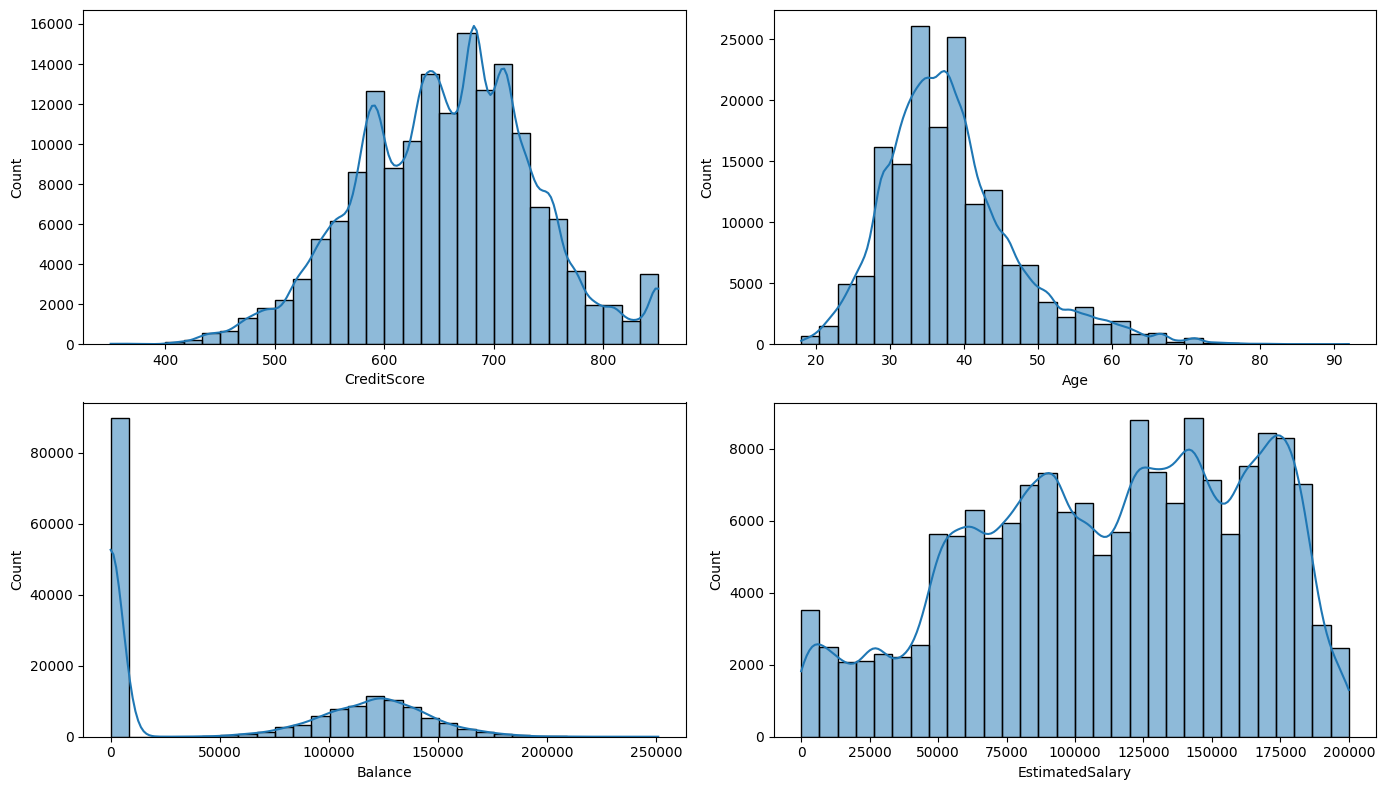

In [216]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//2 + len(numerical_features)%2, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True,palette='#B7C6DB')

plt.tight_layout()
plt.show()


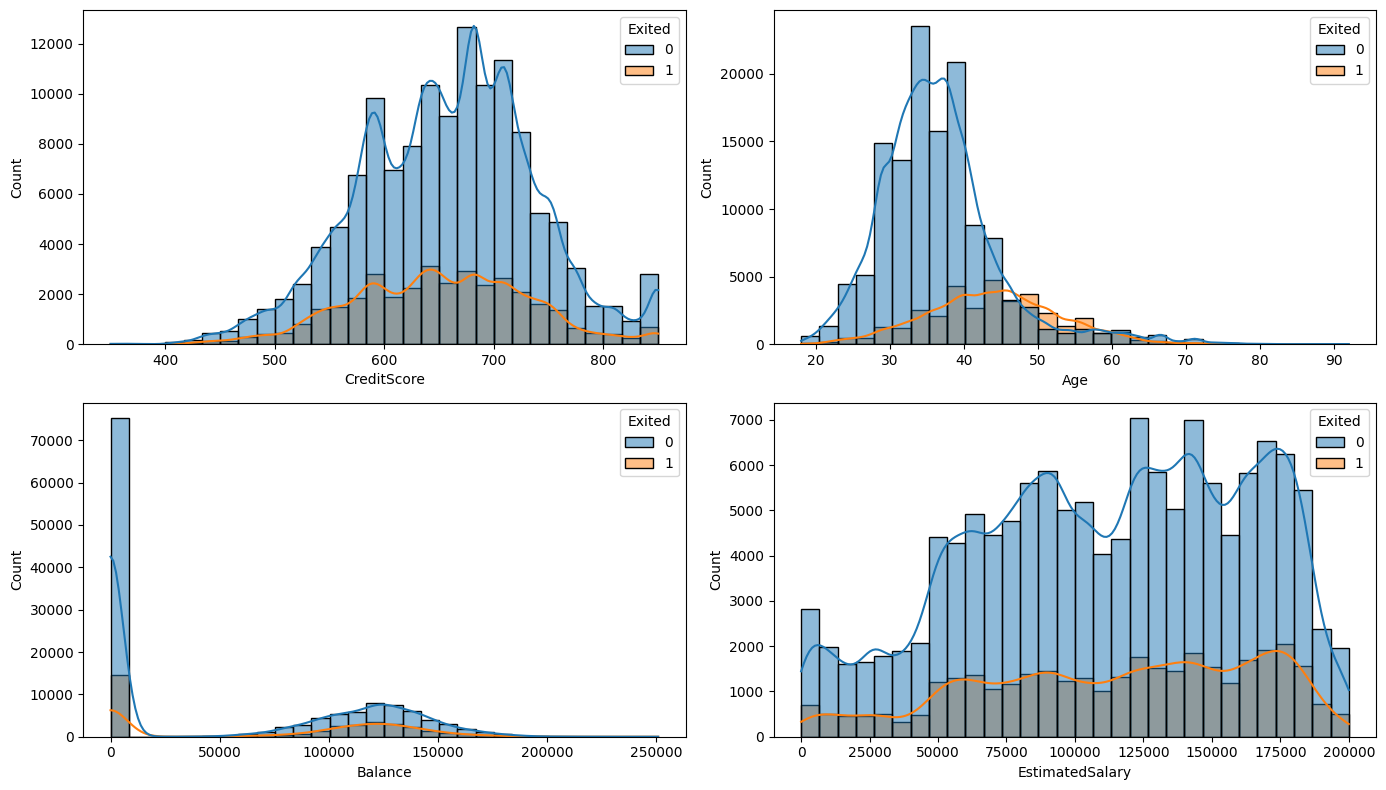

In [217]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//2 + len(numerical_features)%2, 2, i + 1)
    sns.histplot(data=df,x=feature, bins=30, hue='Exited',kde=True)

plt.tight_layout()
plt.show()


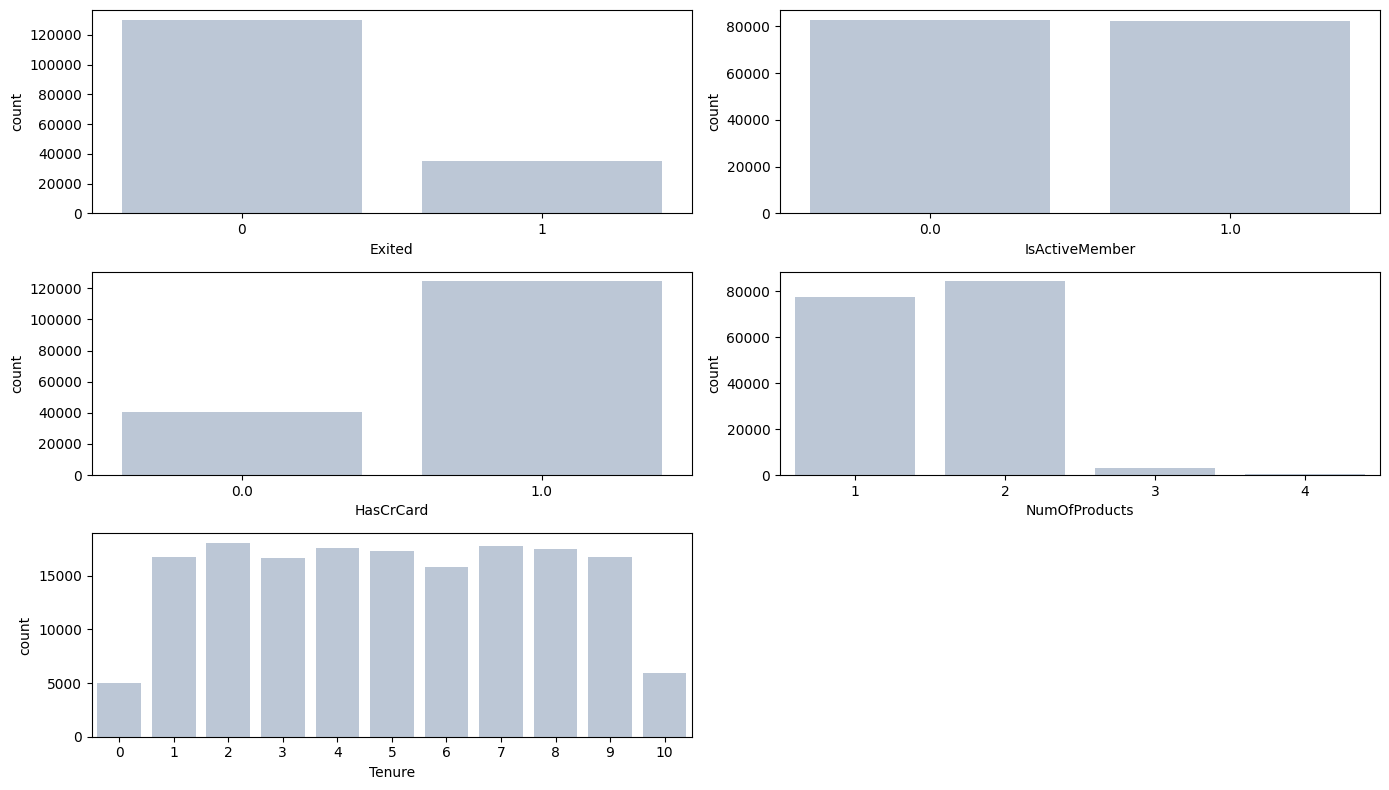

In [218]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features1):
    plt.subplot(len(numerical_features1)//2 + len(numerical_features1)%2, 2, i + 1)
    sns.countplot(data=df,x=feature,color='#B7C6DB')

plt.tight_layout()
plt.show()

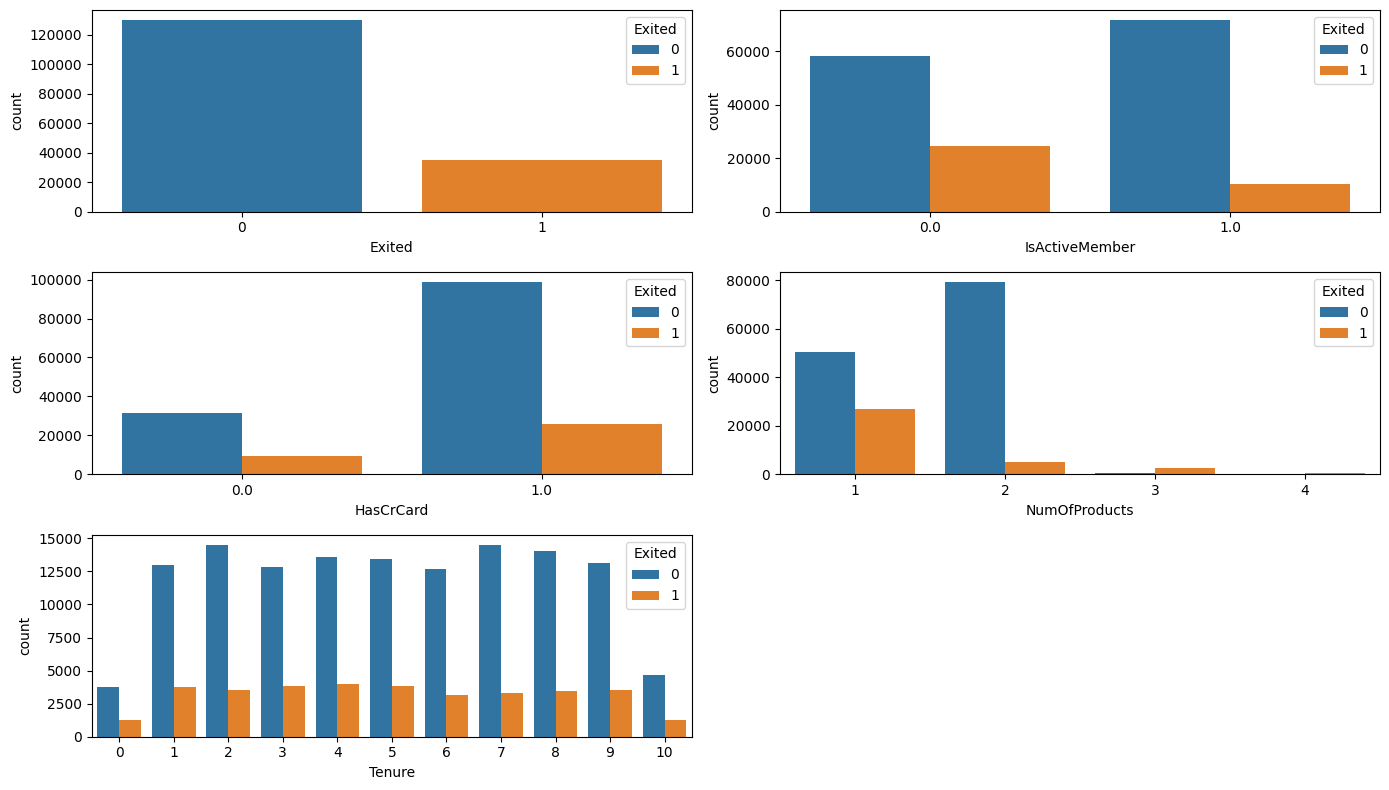

In [219]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features1):
    plt.subplot(len(numerical_features1)//2 + len(numerical_features1)%2, 2, i + 1)
    sns.countplot(data=df,x=feature,hue='Exited')

plt.tight_layout()
plt.show()

/tmp/ipykernel_44685/3057741081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=feature,palette='rocket')
/tmp/ipykernel_44685/3057741081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=feature,palette='rocket')


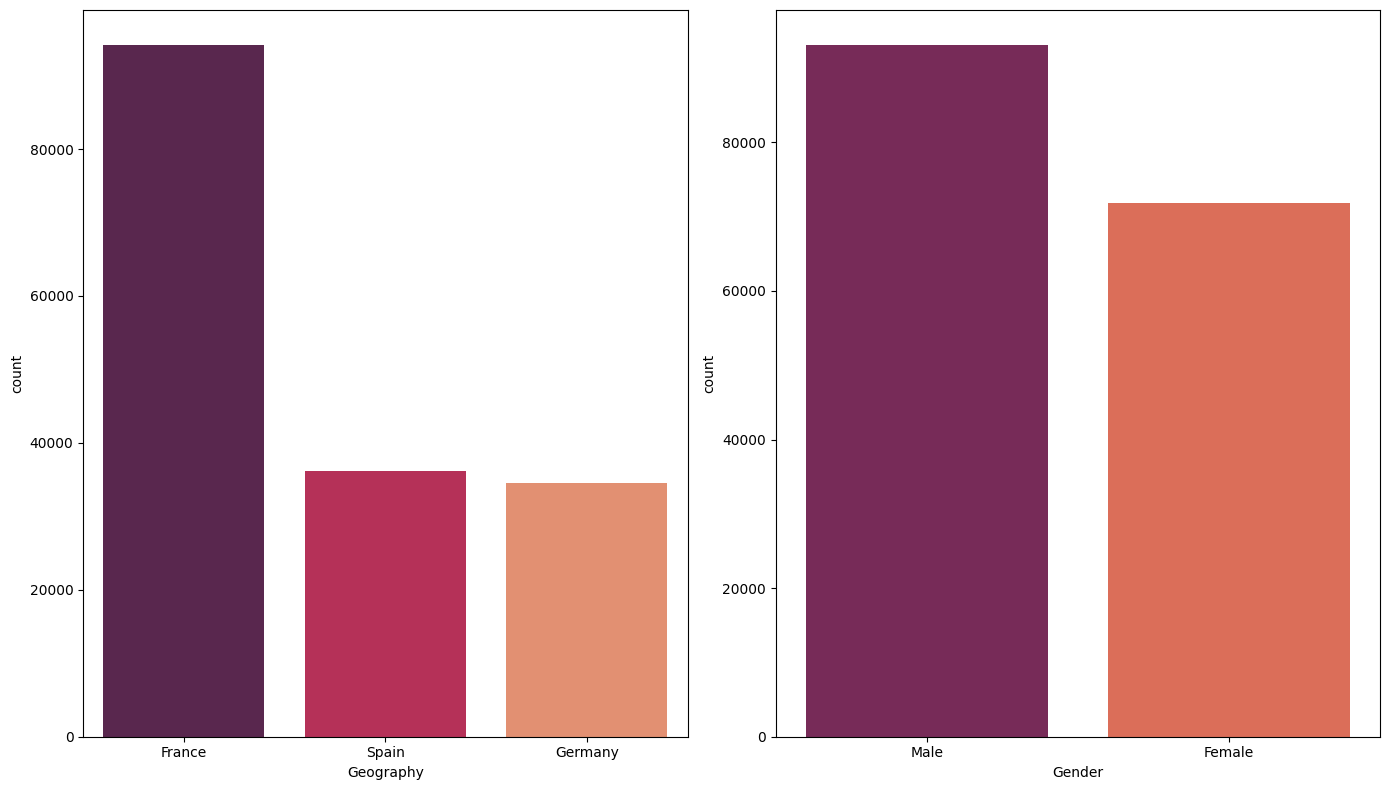

In [220]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features)//2 + len(categorical_features)%2, 2, i + 1)
    sns.countplot(data=df,x=feature,palette='rocket')

plt.tight_layout()
plt.show()


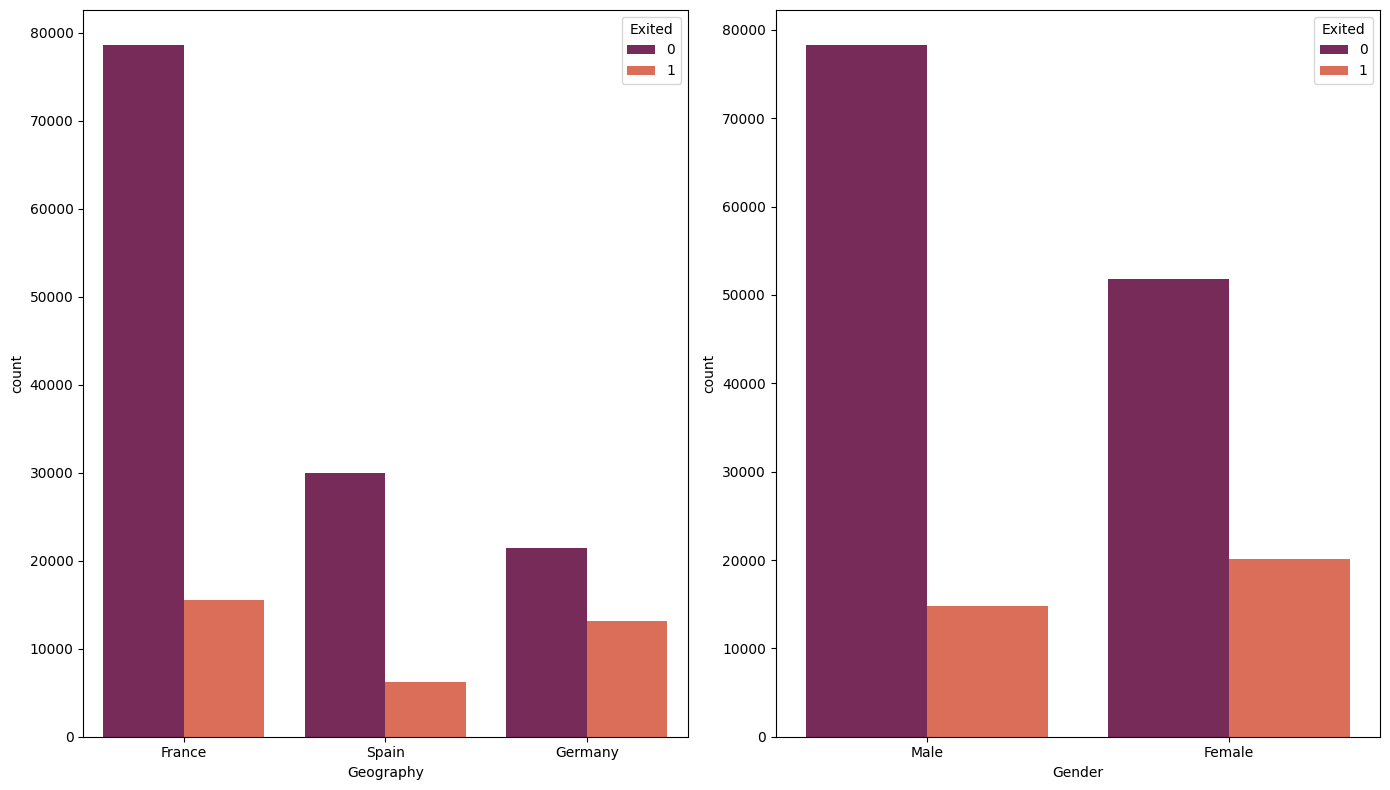

In [221]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features)//2 + len(categorical_features)%2, 2, i + 1)
    sns.countplot(data=df,x=feature,hue='Exited',palette='rocket')

plt.tight_layout()
plt.show()

/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette='mako'
/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette='mako'
/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette='mako'
/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fals

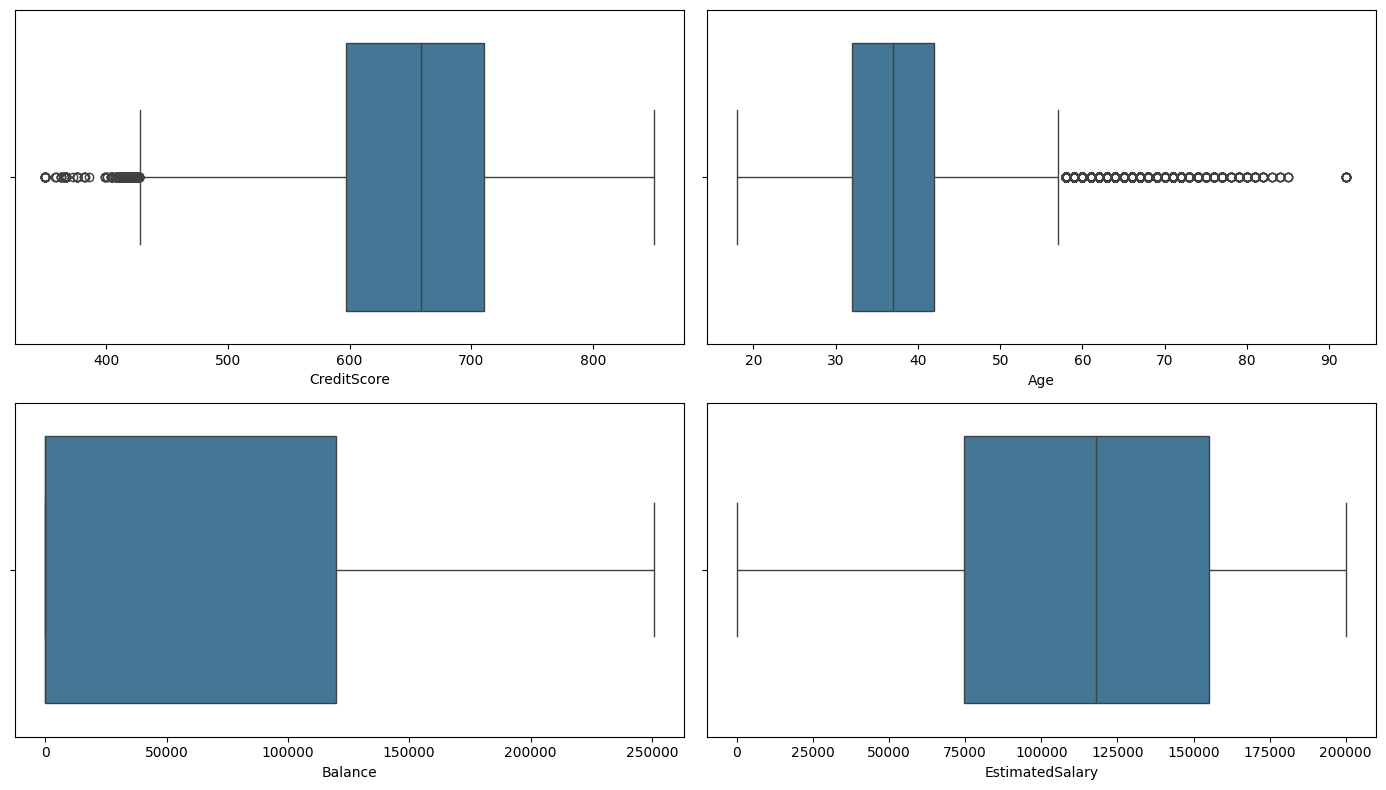

In [222]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//2 + len(numerical_features)%2, 2, i + 1)
    sns.boxplot(data=df,x=feature,palette='mako' 
    )
plt.tight_layout()
plt.show()


**Handling Outliers**

In [223]:
def cap_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[feature] = df[feature].clip(lower, upper)

for feature in ['CreditScore', 'Age']:
    cap_outliers_iqr(df, feature)


/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette='mako'
/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette='mako'
/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=feature,palette='mako'
/tmp/ipykernel_44685/2220998179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fals

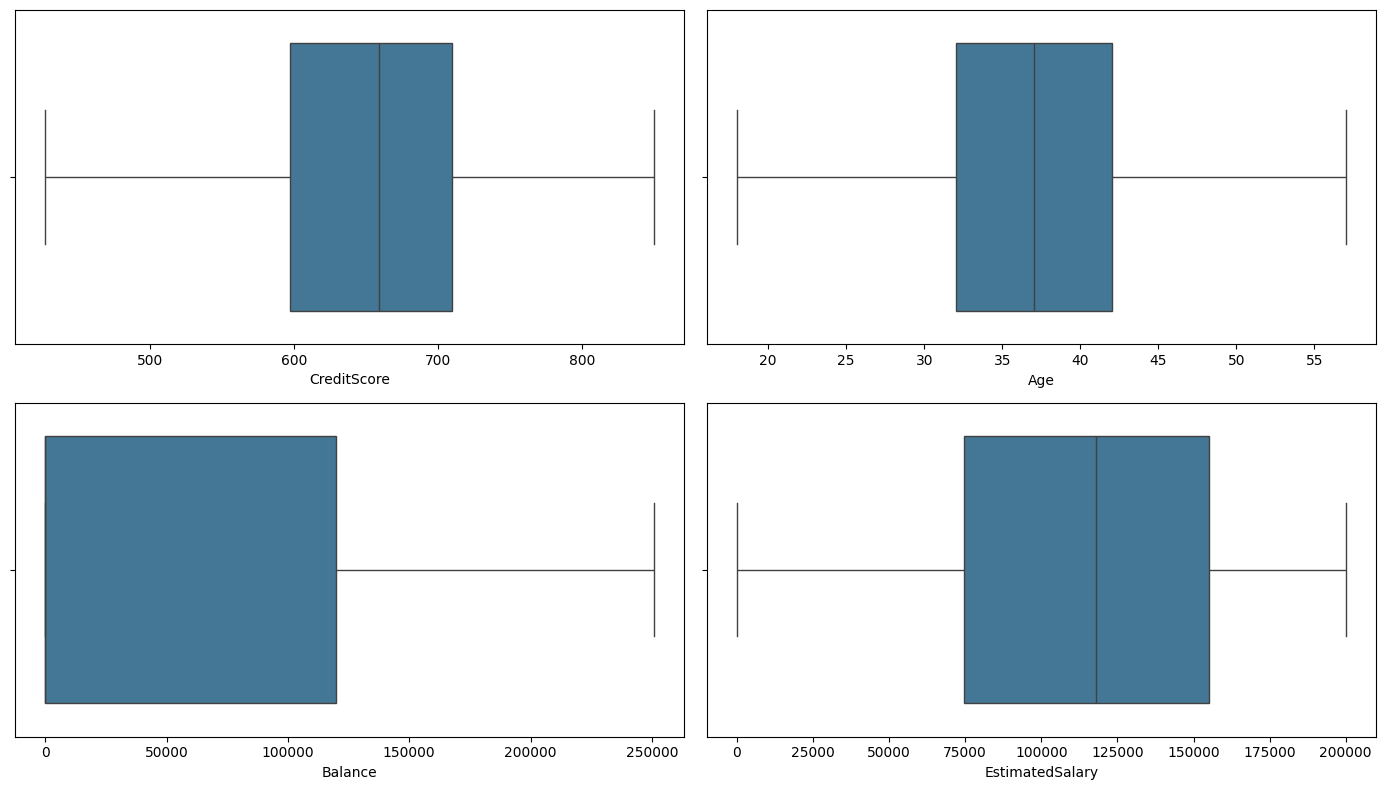

In [224]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//2 + len(numerical_features)%2, 2, i + 1)
    sns.boxplot(data=df,x=feature,palette='mako' 
    )
plt.tight_layout()
plt.show()


In [225]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Exited'].sort_values(ascending=False)
print(churn_corr)

Exited             1.000000
Age                0.363828
Balance            0.129743
EstimatedSalary    0.018827
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027399
IsActiveMember    -0.210237
NumOfProducts     -0.214554
Name: Exited, dtype: float64


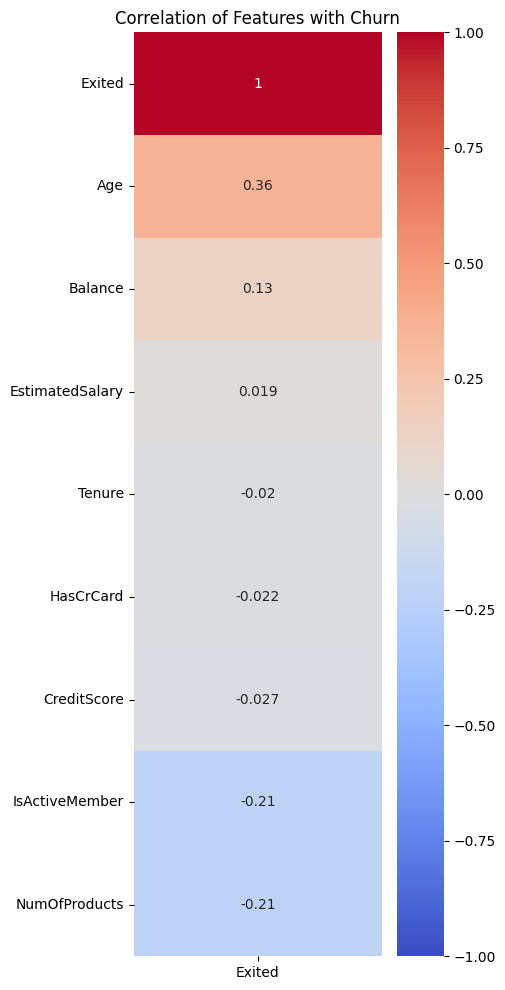

In [226]:
# Focus on correlation with Churn
churn_corr = corr_matrix[['Exited']].sort_values(by='Exited', ascending=False)
# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

## One-hot-encoding

In [227]:
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head(1)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,668.0,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0,False,False


In [228]:
#to convert True/False to 1/0 for all boolean cols
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

## binary encoding

In [229]:
df['Gender']=df['Gender'].map({"Male":1,"Female":0})
df.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,668.0,1,33.0,3,0.0,2,1.0,0.0,181449.97,0,0,0


## Machine learning models

In [230]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X=df.drop(columns=['Exited'])
y=df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3


In [232]:
#RandomForest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

#GradientBoosting
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
)
gb.fit(X_train, y_train)

#XGB
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=3,  
    random_state=42
)

xgb.fit(X_train, y_train)

#LGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-2,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_train, y_train)

#CatBoost
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)

cat.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [233]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

models = {
    "RandomForest": rf,
    "GradientBoosting": gb,
    "LightGBM": lgbm,
    "XGBoost": xgb,
    "CatBoost": cat
}

thresholds = [ 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

results = []

for model_name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]

    for thresh in thresholds:
        preds = (proba >= thresh).astype(int)

        results.append({
            "model": model_name,
            "threshold": thresh,
            "precision_1": precision_score(y_test, preds),
            "recall_1": recall_score(y_test, preds),
            "f1_1": f1_score(y_test, preds),
            "accuracy": accuracy_score(y_test, preds)
        })

results_df = pd.DataFrame(results)


In [234]:
results_df


,model,threshold,precision_1,recall_1,f1_1,accuracy
0,RandomForest,0.20,0.336133,0.957045,0.497525,0.590966
1,RandomForest,0.25,0.365236,0.939290,0.525957,0.641743
2,RandomForest,0.30,0.396021,0.914805,0.552753,0.686763
3,RandomForest,0.35,0.429698,0.889175,0.579399,0.726846
4,RandomForest,0.40,0.463914,0.860538,0.602839,0.760081
5,RandomForest,0.45,0.510983,0.822738,0.630424,0.795892
6,RandomForest,0.50,0.558053,0.774914,0.648843,0.822522
7,GradientBoosting,0.20,0.534830,0.801403,0.641527,0.810495
8,GradientBoosting,0.25,0.581044,0.754009,0.656322,0.832914
9,GradientBoosting,0.30,0.621509,0.707474,0.661712,0.846942


In [235]:
recall_min = 0.8
accuracy_min = 0.75

top_models=results_df[
    (results_df['recall_1']>=recall_min)&
    (results_df['accuracy']>=accuracy_min)]
top_models

,model,threshold,precision_1,recall_1,f1_1,accuracy
4,RandomForest,0.40,0.463914,0.860538,0.602839,0.760081
5,RandomForest,0.45,0.510983,0.822738,0.630424,0.795892
7,GradientBoosting,0.20,0.534830,0.801403,0.641527,0.810495
18,LightGBM,0.40,0.478142,0.848797,0.611702,0.771988
19,LightGBM,0.45,0.513771,0.817297,0.630927,0.797679
24,XGBoost,0.35,0.473547,0.857388,0.610118,0.768140
25,XGBoost,0.40,0.508730,0.826031,0.629666,0.794407
28,CatBoost,0.20,0.527864,0.806987,0.638242,0.806435


## ML model choise XGBoost


In [236]:
MIN_RECALL = 0.80
MIN_ACCURACY = 0.75
THRESHOLD = 0.3


In [237]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score

THRESHOLD = 0.30
MIN_ACCURACY = 0.75

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)

    recall = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    # Penalize low accuracy
    if acc < MIN_ACCURACY:
        return recall - (MIN_ACCURACY - acc) * 2

    return recall


# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)



[I 2026-01-27 19:10:31,646] A new study created in memory with name: no-name-3cc456c6-d3d7-4f01-b138-0d7ae21b30db
[I 2026-01-27 19:10:48,332] Trial 0 finished with value: 0.8426403207331042 and parameters: {'n_estimators': 544, 'learning_rate': 0.12522198862154774, 'max_depth': 8, 'subsample': 0.6360766863351603, 'colsample_bytree': 0.7084763045193012, 'min_child_weight': 3, 'gamma': 0.32389919360625585, 'reg_alpha': 2.789592453286734, 'reg_lambda': 3.0156035518372413}. Best is trial 0 with value: 0.8426403207331042.
[I 2026-01-27 19:10:49,973] Trial 1 finished with value: 0.850046790553748 and parameters: {'n_estimators': 738, 'learning_rate': 0.1452899125614238, 'max_depth': 6, 'subsample': 0.7396540904853699, 'colsample_bytree': 0.9177644220098757, 'min_child_weight': 8, 'gamma': 1.839025755307849, 'reg_alpha': 1.7795527503619435, 'reg_lambda': 0.49013320907980884}. Best is trial 1 with value: 0.850046790553748.
[I 2026-01-27 19:10:51,571] Trial 2 finished with value: 0.817721776258

Best Params: {'n_estimators': 633, 'learning_rate': 0.16534451668112707, 'max_depth': 7, 'subsample': 0.8451649193698058, 'colsample_bytree': 0.9652295827538419, 'min_child_weight': 6, 'gamma': 1.9413795359062782, 'reg_alpha': 2.1109128784051334, 'reg_lambda': 1.7201525389932384}
Best Recall: 0.8571570095634891


In [238]:
best_model = XGBClassifier(
    **study.best_params,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="logloss"
)

best_model.fit(X_train, y_train)

proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))


              precision    recall  f1-score   support

           0       0.95      0.72      0.82     26023
           1       0.45      0.86      0.59      6984

    accuracy                           0.75     33007
   macro avg       0.70      0.79      0.70     33007
weighted avg       0.84      0.75      0.77     33007

ROC-AUC: 0.8801440611461911


In [239]:
import mlflow
import mlflow.sklearn  
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

2026/01/27 19:12:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0      0.951     0.716     0.817     26023
           1      0.449     0.863     0.591      6984

    accuracy                          0.747     33007
   macro avg      0.700     0.789     0.704     33007
weighted avg      0.845     0.747     0.769     33007



## Save model

In [240]:
import mlflow
import mlflow.xgboost

with mlflow.start_run(run_name="xgboost_churn_final"):
    # log parameters
    mlflow.log_params(study.best_params)
    mlflow.log_metric("accuracy", 0.745)
    mlflow.log_metric("recall_churn", 0.865)
    mlflow.log_metric("f1_churn", 0.589)
    mlflow.log_metric("roc_auc", 0.88)

    mlflow.xgboost.log_model(
        xgb_model=best_model,
        name="xgboost_churn_model"
    )


## Test model on test data

In [252]:
df_test=pd.read_csv('/home/ahmed/Ahmed/projects/customer-churn-prediction/data/processed/test.csv')

In [253]:
import os

os.makedirs("models", exist_ok=True)


In [254]:
best_model.save_model("models/final_xgboost_model.json")


In [255]:
df_test.head(1)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75


In [256]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.load_model("models/final_xgboost_model.json")


In [ ]:

df_test_test = df_test.drop(columns=["CustomerId", "Surname","id"])

df_test["Gender"] = df_test["Gender"].map({"Male": 1, "Female": 0})

df_test = pd.get_dummies(
    df_test,
    columns=["Geography"],
    drop_first=True
)



In [259]:
bool_cols = df_test.select_dtypes(include='bool').columns
df_test[bool_cols] = df_test[bool_cols].astype(int)

In [260]:
df_test.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,586,0,23.0,2,0.0,2,0.0,1.0,160976.75,0,0


In [264]:
X_test_processed = df_test.copy()


In [265]:
X_test_processed = X_test_processed[X_train.columns]


In [266]:
THRESHOLD = 0.30

proba = model.predict_proba(X_test_processed)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)


In [267]:
results = X_test_processed.copy()

results["churn_probability"] = proba
results["churn_prediction"] = y_pred

results.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,churn_probability,churn_prediction
0,586,0,23.0,2,0.00,2,0.0,1.0,160976.75,0,0,0.061949,0
1,683,0,46.0,2,0.00,1,1.0,0.0,72549.27,0,0,0.961656,1
2,656,0,34.0,7,0.00,2,1.0,0.0,138882.09,0,0,0.106855,0
3,681,1,36.0,8,0.00,1,1.0,0.0,113931.57,0,0,0.589123,1
4,752,1,38.0,10,121263.62,1,1.0,0.0,139431.00,1,0,0.662519,1
